In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [2]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()
    return results


def dummify(data, column_name):
    """
        Converts the column column_name in dummies / one-hot, adds them to the df and returns the df without
        original undummified columns
    """
    df = data.copy()
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

def dummify2(data, column_name):
    return pd.get_dummies(data[column_name], prefix=column_name)
    
def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [3]:
#Importing excel file and formatting as a pandas dataframe
db = pd.read_excel('base.xlsx')
db.set_index("Country")
db.isnull().sum().sum()
db

,Country,VDEM,1,3,3.0 - No data,5,7.1 - Yes,"7.2 - No, but specifc limit",7.3 - No,9,...,63.3 - Suspension of public funding,63.4 - Loss of public funding,63.5 - Loss of politican rights,63.6 - Prison,63.7 - Deregistration of party,63.8 - Loss of nomination of candidate,63.9 - Loss of elected office,63.10 - Suspension of political party,63.11 - Forfeiture,63.12 - Not Applicable
0,Angola,0.386,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,Argentina,0.812,1,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,Australia,0.838,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,Belgium,0.882,0,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,Brazil,0.674,1,1,0,1,1,0,0,1,...,0,1,0,0,1,1,1,0,0,0
5,Canada,0.866,1,1,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
6,Chile,0.773,1,1,0,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
7,Colombia,0.667,1,0,0,0,1,0,0,1,...,0,1,0,1,1,1,1,1,1,0
8,Czech Republic,0.796,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
9,Denmark,0.900,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [4]:
#Excluding 'countries' and redefining columns

columns = ['VDEM',    '1',    '3',    '3.0 - No data',    '5',    '7.1 - Yes',    
             '7.2 - No,     but specifc limit',    '7.3 - No',    '9',    '9.0 - No data',    '11',    '11.0 - No data',    
             '13.01 - Legal entities',    '13.02 -Other',    '13.-3 - Organizations connected to gambling',    
             '13.04 - Organizations in debt',    '13.05 - No',    '13.06 - Religious organizations',    
             '13.07 - Charities',    '13.08 - Recently founded organizations',    
             '16.0 - No data',    '16.1 - Yes,     for natural persons',    '16.2 - Yes,     for legal persons',    
             '18.0 - No data',    '18.1 - No',    '18.2. - Yes,     for natural persons',    
             '18.3- Yes,     for legal persons',    '18.4 - Regular limits apply',    
             '23',    '23.0 - No data',    '25',    '25.0 - No data',    '25.1 - Sometimes',    '26',    '26.0 - No data',    
             '26.1 - Sometimes',    '39.0 - No data',    '39.1 - No',    '39.2 - Yes,     funds for gender activities',    
             '39.3 - Yes,     other',    '2',    '2.0 - No data',    '2.0 - N/A',    
             '4',    '4.0 - N/A',    '6',    '6.0 - N/A',    '8',    '8.0 - N/A',    '8.1 - No,     bit specific limit',    
             '10',    '10.0 - No data',    '10.0 - N/A',    '12',    '12.0 - No data',    '12.0 - N/A',    '20.0 - N/A',    
             '20.1 - No',    '20.2 - Yes,     for natural persons',    '20.3 - Yes,     for legal persons',    
             '22.0 - No Data',    '22.1 - No',    '22.2 - Specific Limits for candidates',    
             '22.3 - Donation limits for private persons apply',    '24',    '24.0 - No data',    '24.0 - N/A',    '24.1 - Yes,     limit applies',    '27',    '27.0 - No data',    '27.1 - Sometimes',    
             '30.1 No',    '30.2 - Yes,     regularly provided funding',    '30.3 - Yes,     in relation to campaigns',    
             '31.0 - N/A',    '31.1 - Representation in elected body',    '31.2 - Participation in election',    
             '31.3 - Previous election',    '31.4 - Registration of politcal party',    '31.4 - Other',    
             '33.0 - N/A',    '33.1 - No',    '33.2 - Ongoing party activities',    '33.3 - Campaign spending',    
             '33.4 - Research and policy initiatives',    '33.5 - Intra-party institution',    
             '33.6 - Presidential nominating convention',    '37.0 - No data',    '37.1 - No',    '37.2 - Tax Relief',    
             '37.3 - Other',    '38',    '38.0 - No data',    '38.0 - N/A',    '14',    '14.0 - No data',    '15',    
             '15.0 - No data',    '34',    '34.0 - No data',    '35.0 - No data',    '35.0 - N/A',    '35.1 - Equal',    
             '35.2 - Share of seats',    '35.3 - Share of votes',    '35.4 - Number of candidates',    
             '35.5 - Other',    '36',    '36.0 - N/A',    '36.1 - No,     only political parties',    '40',    
             '40.0 - No data',    '41',    '43',    '43.0 - N/A',    '43.1 - Other',    '45.0 - No data',    '45.1 - No',    
             '45.2 - Spending limit exists',    '45.3 - Spending by others on their behalf',    '45.4 - Yes',    '45.6 - Third parties ',    '46.0 - No data',    
             '46.1 - No',    '46.2 -Yes,     for political parties',    '46.3 - Yes,     for candidates',    
             '46.4 - Yes,     for third parties',    '46.5 - Yes',    '47.0 - No data',    '47.1 - No ',    
             '47.2 - Yes,     for political parties',    '47.3 - Yes,     for candidates',    '47.4 - Yes,     for third parties',    '48',    '48.0 - No data',    
             '28',    '28.0 - No data',    '29',    '29.0 - No data',    '29.1 - Sometimes',    '49',    
             '50',    '51',    '51.0 - N/A',    '52',    '52.0 - No data',    '52.1 - Sometimes',    '52.2 - Third parties',    
             '53',    '53.1 - Sometimes',    '54',    '54.0',    '54.1',    '55',    '55.0 - No data',    
             '55.1 - Sometimes',    '56',    '56.0 - No data',    '56.1 - Sometimes',    '57.1 - Yes,     EMB',    
             '57.2 - Yes,     institution for this purpose ',    '57.3 - Yes,     auditing agency',    
             '57.4 - Yes,     ministry',    '57.5 - Yes,     Parliamentary unit',    '57.6 - Yes,     Court',    '57.7 - Yes,     Other',    '58.1 - EMB',    '58.2 - Federal Justice with electoral jurisdiction ',    
             '58.4 - Ministry',    '58.5 - Parliamentary Unit',    '58.6 - Special Institution',    
             '58.7 - Auditing Agency',    '58.8 - Court',    '58.9 - Other',    '59.1 - impose fines',    
             '59.2 - Refer for investigation',    '59.3 - Carry out investigation',    
             '59.4 - Impose sanctions',    
             '59.5 - Request additional information from potential violator',    
             '59.6 - Request additional information from others',    '59.7 - other',    '59.8 - No data',    '60.1 - No data',    
             '60.2 - Not applicable',    '60.3 - Refer for investigation',    
             '60.4 - Carry out investigation',    
             '60.5 - Request additional information from potential violator',    
             '60.6 - Request additional information from others',    
             '60.7 - Impose sanctions',    '62.1 - No data',    
             '62.2 - Not applicable',    
             '62.3 - None',    '62.4 - Other',    '62.5 - Court',    '62.6 - Body of Auditors',    
             '62.7 - Auditing agency',    '62.8 - Ministry',    '62.9 - parliamentary unit',    
             '62.10 - Institution for this purpose',    '62.11 - EMB',    
             '63.1 – Other',    '63.2 - Fines',    '63.3 - Suspension of public funding',    
             '63.4 - Loss of public funding',    '63.5 - Loss of politican rights',    '63.6 - Prison',    
             '63.7 - Deregistration of party',    '63.8 - Loss of nomination of candidate',    
             '63.9 - Loss of elected office',    '63.10 - Suspension of political party',    '63.11 - Forfeiture']

#Correction
db = db.reindex(columns=columns)

#Organized columns to draw from
columns

['VDEM',
 '1',
 '3',
 '3.0 - No data',
 '5',
 '7.1 - Yes',
 '7.2 - No,     but specifc limit',
 '7.3 - No',
 '9',
 '9.0 - No data',
 '11',
 '11.0 - No data',
 '13.01 - Legal entities',
 '13.02 -Other',
 '13.-3 - Organizations connected to gambling',
 '13.04 - Organizations in debt',
 '13.05 - No',
 '13.06 - Religious organizations',
 '13.07 - Charities',
 '13.08 - Recently founded organizations',
 '16.0 - No data',
 '16.1 - Yes,     for natural persons',
 '16.2 - Yes,     for legal persons',
 '18.0 - No data',
 '18.1 - No',
 '18.2. - Yes,     for natural persons',
 '18.3- Yes,     for legal persons',
 '18.4 - Regular limits apply',
 '23',
 '23.0 - No data',
 '25',
 '25.0 - No data',
 '25.1 - Sometimes',
 '26',
 '26.0 - No data',
 '26.1 - Sometimes',
 '39.0 - No data',
 '39.1 - No',
 '39.2 - Yes,     funds for gender activities',
 '39.3 - Yes,     other',
 '2',
 '2.0 - No data',
 '2.0 - N/A',
 '4',
 '4.0 - N/A',
 '6',
 '6.0 - N/A',
 '8',
 '8.0 - N/A',
 '8.1 - No,     bit specific limit'

In [5]:
#Redefining dataframe
df = db[['VDEM',
 '1',
 '3',
 '3.0 - No data',
 '5',
 '7.1 - Yes',
 '7.2 - No,     but specifc limit',
 '7.3 - No',
 '9',
 '9.0 - No data',
 '11',
 '11.0 - No data',
 '13.01 - Legal entities',
 '13.02 -Other',
 '13.-3 - Organizations connected to gambling',
 '13.04 - Organizations in debt',
 '13.05 - No',
 '13.06 - Religious organizations',
 '13.07 - Charities',
 '13.08 - Recently founded organizations',
 '16.0 - No data',
 '16.1 - Yes,     for natural persons',
 '16.2 - Yes,     for legal persons',
 '18.0 - No data',
 '18.1 - No',
 '18.2. - Yes,     for natural persons',
 '18.3- Yes,     for legal persons',
 '18.4 - Regular limits apply',
 '23',
 '23.0 - No data',
 '25',
 '25.0 - No data',
 '25.1 - Sometimes',
 '26',
 '26.0 - No data',
 '26.1 - Sometimes',
 '39.0 - No data',
 '39.1 - No',
 '39.2 - Yes,     funds for gender activities',
 '39.3 - Yes,     other',
 '2',
 '2.0 - No data',
 '2.0 - N/A',
 '4',
 '4.0 - N/A',
 '6',
 '6.0 - N/A',
 '8',
 '8.0 - N/A',
 '8.1 - No,     bit specific limit',
 '10',
 '10.0 - No data',
 '10.0 - N/A',
 '12',
 '12.0 - No data',
 '12.0 - N/A',
 '20.0 - N/A',
 '20.1 - No',
 '20.2 - Yes,     for natural persons',
 '20.3 - Yes,     for legal persons',
 '22.0 - No Data',
 '22.1 - No',
 '22.2 - Specific Limits for candidates',
 '22.3 - Donation limits for private persons apply',
 '24',
 '24.0 - No data',
 '24.0 - N/A',
 '24.1 - Yes,     limit applies',
 '27',
 '27.0 - No data',
 '27.1 - Sometimes',
 '30.1 No',
 '30.2 - Yes,     regularly provided funding',
 '30.3 - Yes,     in relation to campaigns',
 '31.0 - N/A',
 '31.1 - Representation in elected body',
 '31.2 - Participation in election',
 '31.3 - Previous election',
 '31.4 - Registration of politcal party',
 '31.4 - Other',
 '33.0 - N/A',
 '33.1 - No',
 '33.2 - Ongoing party activities',
 '33.3 - Campaign spending',
 '33.4 - Research and policy initiatives',
 '33.5 - Intra-party institution',
 '33.6 - Presidential nominating convention',
 '37.0 - No data',
 '37.1 - No',
 '37.2 - Tax Relief',
 '37.3 - Other',
 '38',
 '38.0 - No data',
 '38.0 - N/A',
 '14',
 '14.0 - No data',
 '15',
 '15.0 - No data',
 '34',
 '34.0 - No data',
 '35.0 - No data',
 '35.0 - N/A',
 '35.1 - Equal',
 '35.2 - Share of seats',
 '35.3 - Share of votes',
 '35.4 - Number of candidates',
 '35.5 - Other',
 '36',
 '36.0 - N/A',
 '36.1 - No,     only political parties',
 '40',
 '40.0 - No data',
 '41',
 '43',
 '43.0 - N/A',
 '43.1 - Other',
 '45.0 - No data',
 '45.1 - No',
 '45.2 - Spending limit exists',
 '45.3 - Spending by others on their behalf',
 '45.4 - Yes',
 '45.6 - Third parties ',
 '46.0 - No data',
 '46.1 - No',
 '46.2 -Yes,     for political parties',
 '46.3 - Yes,     for candidates',
 '46.4 - Yes,     for third parties',
 '46.5 - Yes',
 '47.0 - No data',
 '47.1 - No ',
 '47.2 - Yes,     for political parties',
 '47.3 - Yes,     for candidates',
 '47.4 - Yes,     for third parties',
 '48',
 '48.0 - No data',
 '28',
 '28.0 - No data',
 '29',
 '29.0 - No data',
 '29.1 - Sometimes',
 '49',
 '50',
 '51',
 '51.0 - N/A',
 '52',
 '52.0 - No data',
 '52.1 - Sometimes',
 '52.2 - Third parties',
 '53',
 '53.1 - Sometimes',
 '54',
 '54.0',
 '54.1',
 '55',
 '55.0 - No data',
 '55.1 - Sometimes',
 '56',
 '56.0 - No data',
 '56.1 - Sometimes',
 '57.1 - Yes,     EMB',
 '57.2 - Yes,     institution for this purpose ',
 '57.3 - Yes,     auditing agency',
 '57.4 - Yes,     ministry',
 '57.5 - Yes,     Parliamentary unit',
 '57.6 - Yes,     Court',
 '57.7 - Yes,     Other',
 '58.1 - EMB',
 '58.2 - Federal Justice with electoral jurisdiction ',
 '58.4 - Ministry',
 '58.5 - Parliamentary Unit',
 '58.6 - Special Institution',
 '58.7 - Auditing Agency',
 '58.8 - Court',
 '58.9 - Other',
 '59.1 - impose fines',
 '59.2 - Refer for investigation',
 '59.3 - Carry out investigation',
 '59.4 - Impose sanctions',
 '59.5 - Request additional information from potential violator',
 '59.6 - Request additional information from others',
 '59.7 - other',
 '59.8 - No data',
 '60.1 - No data',
 '60.2 - Not applicable',
 '60.3 - Refer for investigation',
 '60.4 - Carry out investigation',
 '60.5 - Request additional information from potential violator',
 '60.6 - Request additional information from others',
 '60.7 - Impose sanctions',
 '62.1 - No data',
 '62.2 - Not applicable',
 '62.3 - None',
 '62.4 - Other',
 '62.5 - Court',
 '62.6 - Body of Auditors',
 '62.7 - Auditing agency',
 '62.8 - Ministry',
 '62.9 - parliamentary unit',
 '62.10 - Institution for this purpose',
 '62.11 - EMB',
 '63.1 – Other',
 '63.2 - Fines',
 '63.3 - Suspension of public funding',
 '63.4 - Loss of public funding',
 '63.5 - Loss of politican rights',
 '63.6 - Prison',
 '63.7 - Deregistration of party',
 '63.8 - Loss of nomination of candidate',
 '63.9 - Loss of elected office',
 '63.10 - Suspension of political party',
 '63.11 - Forfeiture']]

In [6]:
#Defining regression variables
Y = df['VDEM']
X = df[['1',
 '3',
 '3.0 - No data',
 '5',
 '7.1 - Yes',
 '7.2 - No,     but specifc limit',
 '7.3 - No',
 '9',
 '9.0 - No data',
 '11',
 '11.0 - No data',
 '13.01 - Legal entities',
 '13.02 -Other',
 '13.-3 - Organizations connected to gambling',
 '13.04 - Organizations in debt',
 '13.05 - No',
 '13.06 - Religious organizations',
 '13.07 - Charities',
 '13.08 - Recently founded organizations',
 '16.0 - No data',
 '16.1 - Yes,     for natural persons',
 '16.2 - Yes,     for legal persons',
 '18.0 - No data',
 '18.1 - No',
 '18.2. - Yes,     for natural persons',
 '18.3- Yes,     for legal persons',
 '18.4 - Regular limits apply',
 '23',
 '23.0 - No data',
 '25',
 '25.0 - No data',
 '25.1 - Sometimes',
 '26',
 '26.0 - No data',
 '26.1 - Sometimes',
 '39.0 - No data',
 '39.1 - No',
 '39.2 - Yes,     funds for gender activities',
 '39.3 - Yes,     other',
 '2',
 '2.0 - No data',
 '2.0 - N/A',
 '4',
 '4.0 - N/A',
 '6',
 '6.0 - N/A',
 '8',
 '8.0 - N/A',
 '8.1 - No,     bit specific limit',
 '10',
 '10.0 - No data',
 '10.0 - N/A',
 '12',
 '12.0 - No data',
 '12.0 - N/A',
 '20.0 - N/A',
 '20.1 - No',
 '20.2 - Yes,     for natural persons',
 '20.3 - Yes,     for legal persons',
 '22.0 - No Data',
 '22.1 - No',
 '22.2 - Specific Limits for candidates',
 '22.3 - Donation limits for private persons apply',
 '24',
 '24.0 - No data',
 '24.0 - N/A',
 '24.1 - Yes,     limit applies',
 '27',
 '27.0 - No data',
 '27.1 - Sometimes',
 '30.1 No',
 '30.2 - Yes,     regularly provided funding',
 '30.3 - Yes,     in relation to campaigns',
 '31.0 - N/A',
 '31.1 - Representation in elected body',
 '31.2 - Participation in election',
 '31.3 - Previous election',
 '31.4 - Registration of politcal party',
 '31.4 - Other',
 '33.0 - N/A',
 '33.1 - No',
 '33.2 - Ongoing party activities',
 '33.3 - Campaign spending',
 '33.4 - Research and policy initiatives',
 '33.5 - Intra-party institution',
 '33.6 - Presidential nominating convention',
 '37.0 - No data',
 '37.1 - No',
 '37.2 - Tax Relief',
 '37.3 - Other',
 '38',
 '38.0 - No data',
 '38.0 - N/A',
 '14',
 '14.0 - No data',
 '15',
 '15.0 - No data',
 '34',
 '34.0 - No data',
 '35.0 - No data',
 '35.0 - N/A',
 '35.1 - Equal',
 '35.2 - Share of seats',
 '35.3 - Share of votes',
 '35.4 - Number of candidates',
 '35.5 - Other',
 '36',
 '36.0 - N/A',
 '36.1 - No,     only political parties',
 '40',
 '40.0 - No data',
 '41',
 '43',
 '43.0 - N/A',
 '43.1 - Other',
 '45.0 - No data',
 '45.1 - No',
 '45.2 - Spending limit exists',
 '45.3 - Spending by others on their behalf',
 '45.4 - Yes',
 '45.6 - Third parties ',
 '46.0 - No data',
 '46.1 - No',
 '46.2 -Yes,     for political parties',
 '46.3 - Yes,     for candidates',
 '46.4 - Yes,     for third parties',
 '46.5 - Yes',
 '47.0 - No data',
 '47.1 - No ',
 '47.2 - Yes,     for political parties',
 '47.3 - Yes,     for candidates',
 '47.4 - Yes,     for third parties',
 '48',
 '48.0 - No data',
 '28',
 '28.0 - No data',
 '29',
 '29.0 - No data',
 '29.1 - Sometimes',
 '49',
 '50',
 '51',
 '51.0 - N/A',
 '52',
 '52.0 - No data',
 '52.1 - Sometimes',
 '52.2 - Third parties',
 '53',
 '53.1 - Sometimes',
 '54',
 '54.0',
 '54.1',
 '55',
 '55.0 - No data',
 '55.1 - Sometimes',
 '56',
 '56.0 - No data',
 '56.1 - Sometimes',
 '57.1 - Yes,     EMB',
 '57.2 - Yes,     institution for this purpose ',
 '57.3 - Yes,     auditing agency',
 '57.4 - Yes,     ministry',
 '57.5 - Yes,     Parliamentary unit',
 '57.6 - Yes,     Court',
 '57.7 - Yes,     Other',
 '58.1 - EMB',
 '58.2 - Federal Justice with electoral jurisdiction ',
 '58.4 - Ministry',
 '58.5 - Parliamentary Unit',
 '58.6 - Special Institution',
 '58.7 - Auditing Agency',
 '58.8 - Court',
 '58.9 - Other',
 '59.1 - impose fines',
 '59.2 - Refer for investigation',
 '59.3 - Carry out investigation',
 '59.4 - Impose sanctions',
 '59.5 - Request additional information from potential violator',
 '59.6 - Request additional information from others',
 '59.7 - other',
 '59.8 - No data',
 '60.1 - No data',
 '60.2 - Not applicable',
 '60.3 - Refer for investigation',
 '60.4 - Carry out investigation',
 '60.5 - Request additional information from potential violator',
 '60.6 - Request additional information from others',
 '60.7 - Impose sanctions',
 '62.1 - No data',
 '62.2 - Not applicable',
 '62.3 - None',
 '62.4 - Other',
 '62.5 - Court',
 '62.6 - Body of Auditors',
 '62.7 - Auditing agency',
 '62.8 - Ministry',
 '62.9 - parliamentary unit',
 '62.10 - Institution for this purpose',
 '62.11 - EMB',
 '63.1 – Other',
 '63.2 - Fines',
 '63.3 - Suspension of public funding',
 '63.4 - Loss of public funding',
 '63.5 - Loss of politican rights',
 '63.6 - Prison',
 '63.7 - Deregistration of party',
 '63.8 - Loss of nomination of candidate',
 '63.9 - Loss of elected office',
 '63.10 - Suspension of political party',
 '63.11 - Forfeiture']]

In [7]:
# K most relevant correlations

l = db.corr().head(1)
l = l.transpose()
l = l.sort_values(by=['VDEM'],ascending=False)
l.head(20)

,VDEM
VDEM,1.000000
33.1 - No,0.527975
47.0 - No data,0.369609
54.1,0.317564
31.3 - Previous election,0.302109
58.4 - Ministry,0.277016
59.7 - other,0.246084
27.0 - No data,0.240314
58.5 - Parliamentary Unit,0.233523
26.0 - No data,0.213431


In [8]:
# Implementation of feature selection method: variance treshold

X = variance_threshold_selector(X, .85 * (1 - .85))
# If line has over 85% of equal answers, we can exclude as it explains nothing

X

/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_variance_threshold.py:77: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_variance_threshold.py:88: RuntimeWarning: invalid value encountered in less_equal
  (self.variances_ <= self.threshold)):
/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_variance_threshold.py:99: RuntimeWarning: invalid value encountered in greater
  return self.variances_ > self.threshold


,7.1 - Yes,13.01 - Legal entities,13.02 -Other,13.-3 - Organizations connected to gambling,13.05 - No,13.06 - Religious organizations,18.1 - No,25.0 - No data,39.1 - No,20.1 - No,...,60.7 - Impose sanctions,62.4 - Other,62.5 - Court,62.8 - Ministry,63.4 - Loss of public funding,63.6 - Prison,63.7 - Deregistration of party,63.8 - Loss of nomination of candidate,63.9 - Loss of elected office,63.11 - Forfeiture
0,0,1,1,0,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,1,1,0,1,0,1,1,1,0
5,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,1,0,0,1
6,0,1,1,1,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
7,1,0,1,1,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,1,1
8,1,0,1,0,0,0,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
9,0,0,0,0,1,0,1,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [11]:
dici = {}
rsquared = []
questions = []
questionsCoefficients = []
for c in X.columns:
    coefficients =[]
    dvar = dummify2(X, c)
    X = dummify(X, c)
    clf = regress(dvar,Y)
    #print(clf.summary())
    rsquared.append(clf.rsquared)
    questions.append(c)
    questionsCoefficients.append(dict(clf.params))

dici['Rsquared'] = rsquared
dici['Questions'] = questions
dici['Coefficients'] = questionsCoefficients
frame = pd.DataFrame.from_dict(dici)
#frame = frame.sort_values(by='Coefficients', ascending=False)
#print(frame)
#frame = frame.head(11)
#X = df[list(frame["Questions"])]
#for c in X.columns:
   # X = dummify(X, c)
junto = {}
dici2 = {}
for e in dici['Coefficients']:
    junto.update(e)
questions = []
questionsCoefficients = []
for e in junto:
    questionsCoefficients.append(junto[e])
    questions.append(e)
dici2['Questions'] = questions
dici2['Coefficient'] = questionsCoefficients

frame2 = pd.DataFrame.from_dict(dici2)
frame2 = frame2.sort_values(by='Coefficient', ascending=False)

frame2.head(20)

,Questions,Coefficient
79,33.1 - No_1_1,0.861154
76,33.1 - No_0_0,0.861154
140,47.0 - No data_0_0,0.843800
143,47.0 - No data_1_1,0.843800
55,27.0 - No data_1_1,0.834167
52,27.0 - No data_0_0,0.834167
164,54.1_0_0,0.812214
167,54.1_1_1,0.812214
145,47.1 - No _0_1,0.810000
146,47.1 - No _1_0,0.810000


In [10]:
results = regress(X,Y)
# Regression with selected features
results.summary()

/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/Users/felipe.germanos/Projects/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   VDEM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 22 Jul 2020   Prob (F-statistic):                nan
Time:                        01:41:10   Log-Likelihood:                 1251.5
No. Observations:                  37   AIC:                            -2429.
Df Residuals:                       0   BIC:                            -2369.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
7.1 - Yes_0                                                         0.0242        inf          0        nan         nan         nan
7.1 - Yes_1                                                        -0.0074        inf         -0        nan         nan         nan
13.01 - Legal entities_0                                            0.0182        inf          0        nan         nan         nan
13.01 - Legal entities_1                                           -0.0013        inf         -0        nan         nan         nan
13.02 -Other_0                                                      0.0087        inf          0        nan         nan         nan
13.02 -Other_1                                                      0.0082        inf          0        nan         nan         nan
13.-3 - Organizations connected to gambling_0                       0.0838        inf          0        nan         nan         nan
13.-3 - Organizations connected to gambling_1                      -0.0670        inf         -0        nan         nan         nan
13.05 - No_0                                                        0.0066        inf          0        nan         nan         nan
13.05 - No_1                                                        0.0102        inf          0        nan         nan         nan
13.06 - Religious organizations_0                                   0.0005        inf          0        nan         nan         nan
13.06 - Religious organizations_1                                   0.0164        inf          0        nan         nan         nan
18.1 - No_0                                                         0.0106        inf          0        nan         nan         nan
18.1 - No_1                                                         0.0062        inf          0        nan         nan         nan
25.0 - No data_0                                                    0.0433        inf          0        nan         nan         nan
25.0 - No data_1                                                   -0.0265        inf         -0        nan         nan         nan
39.1 - No_0                                                         0.0739        inf          0        nan         nan         nan
39.1 - No_1                                                        -0.0571        inf         -0        nan         nan         nan
20.1 - No_0                                                         0.0401        inf          0        nan         nan         nan
20.1 - No_1                                                        -0.0233        inf         -0        nan         nan         nan
22.1 - No_0                                    

<IPython.core.display.Javascript object>


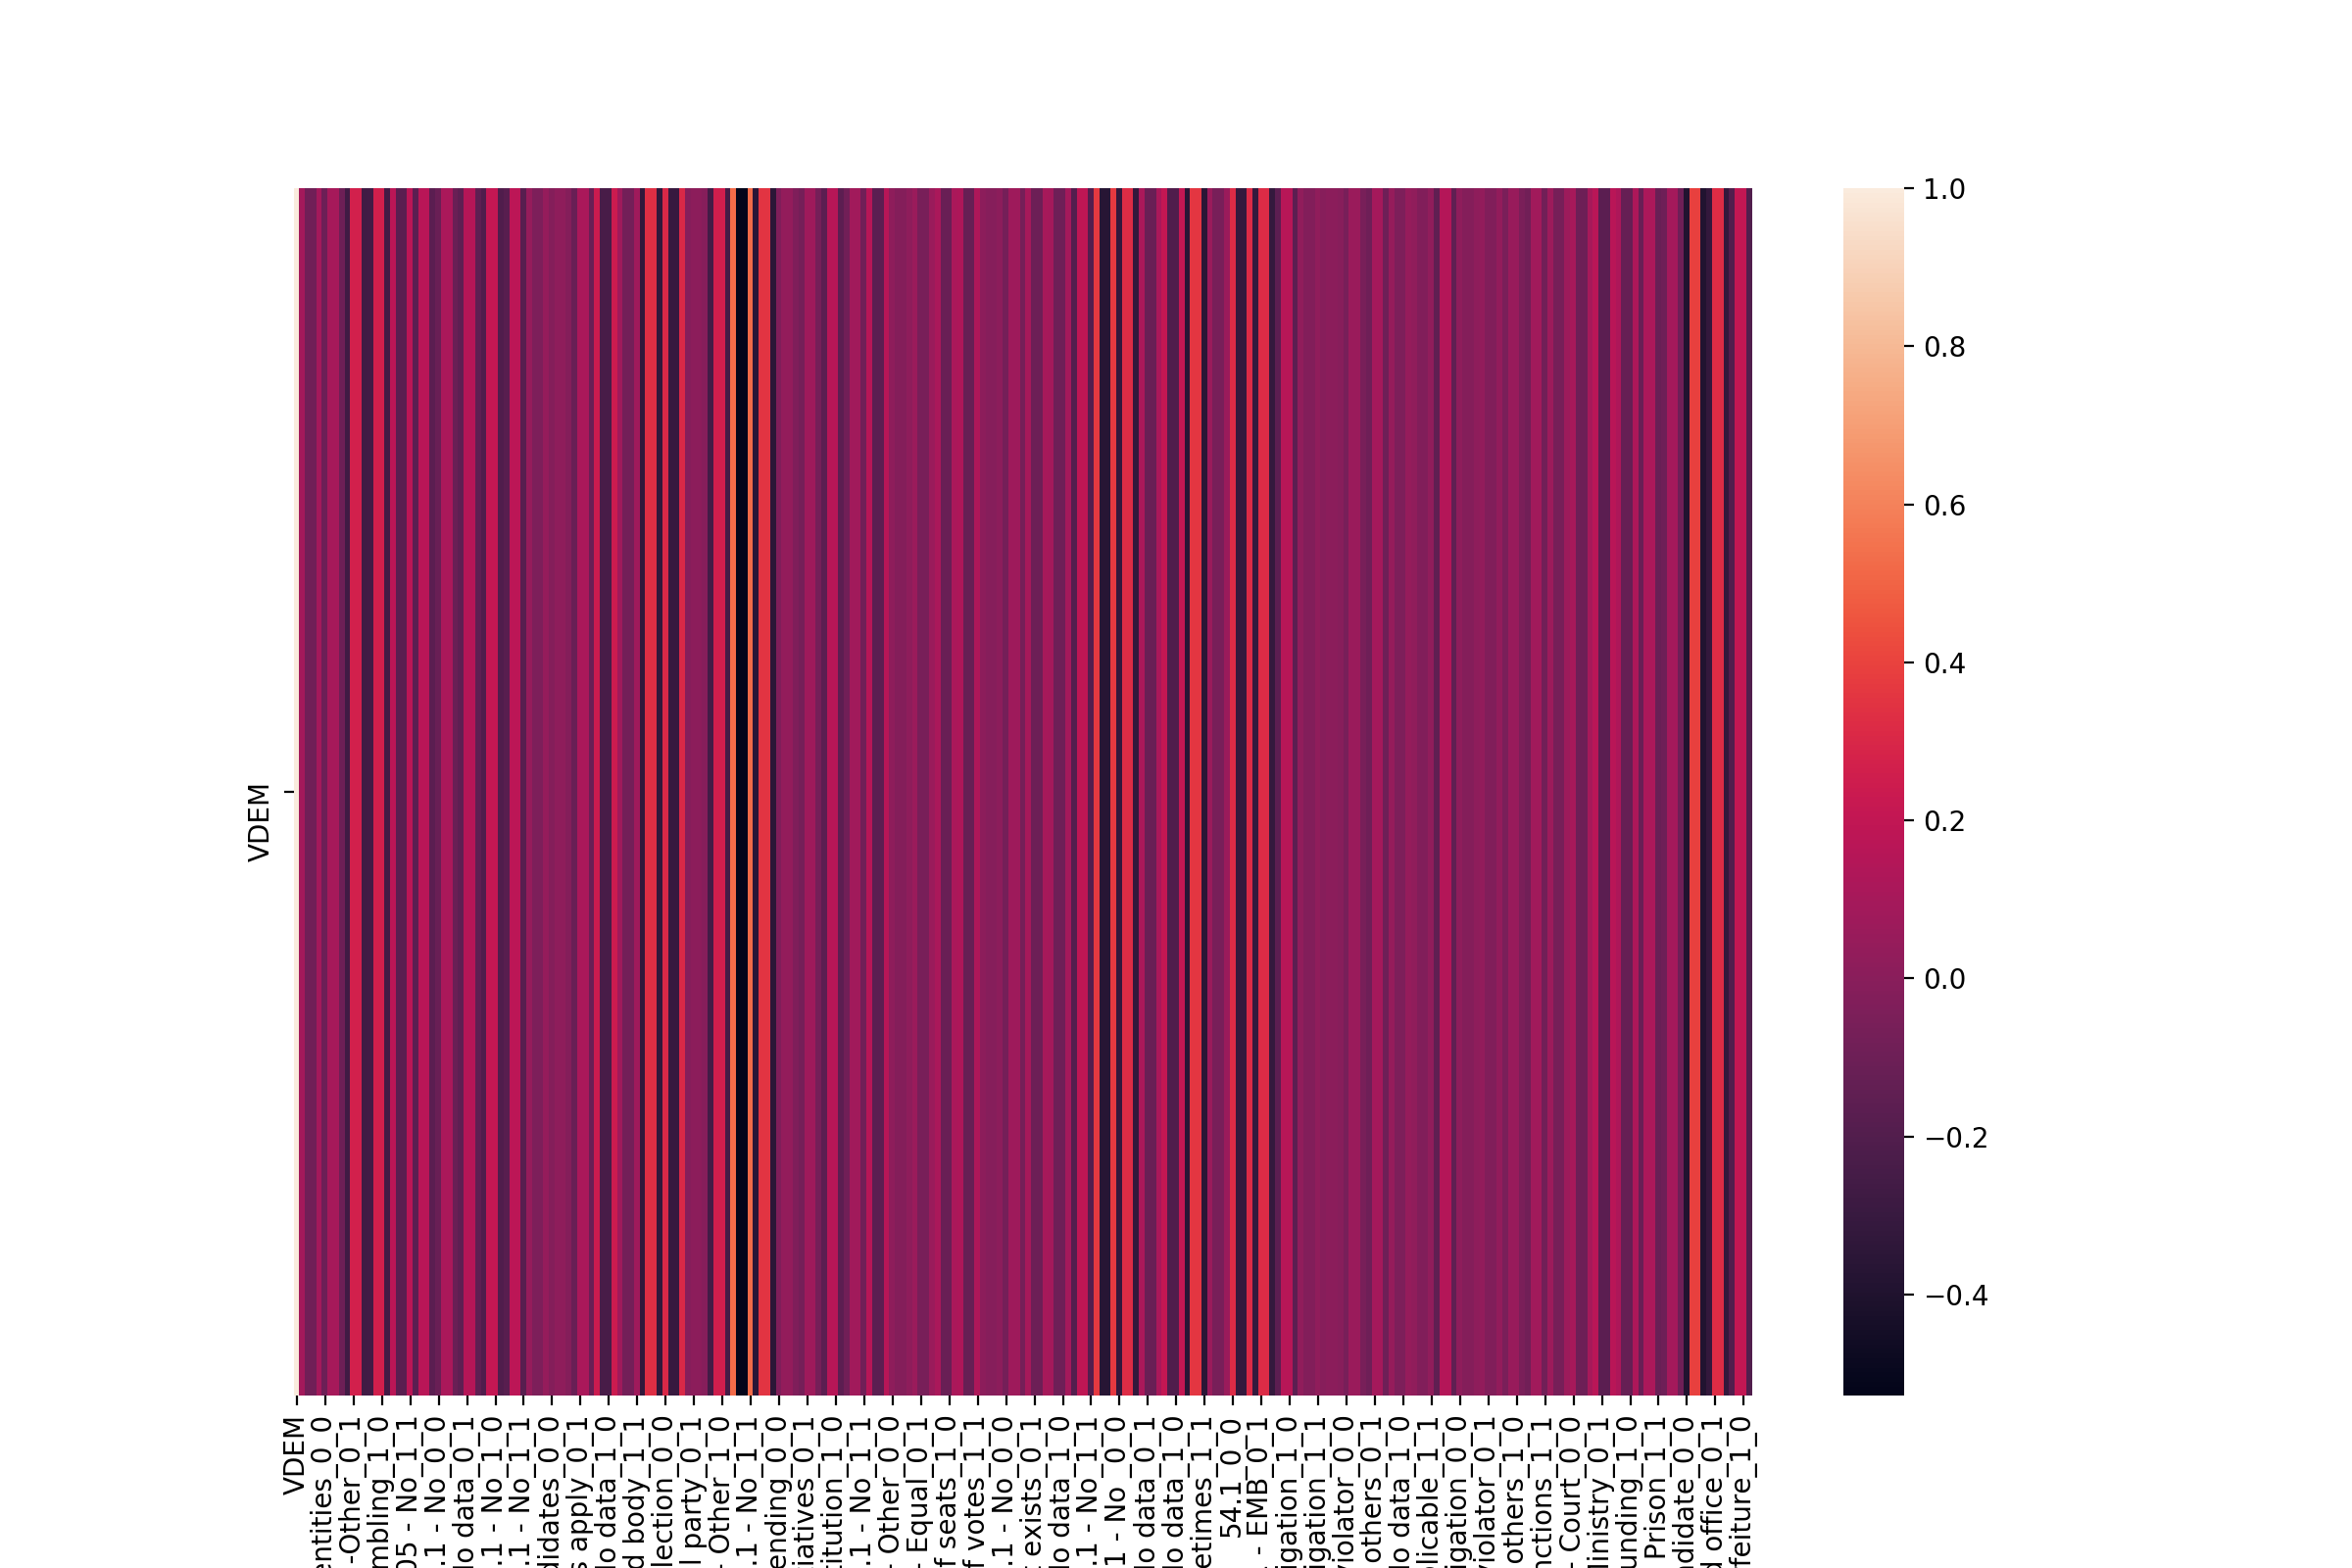

In [14]:
result = pd.merge(Y, X, left_index=True, right_index=True)
result = result.corr()
result = result.head(1)

plt.figure(figsize=(12,8))
sn.heatmap(result, square=False)
plt.show()